## PLHS

In [39]:
from time import *
import numpy as np
from scipy.stats.qmc import LatinHypercube as LHSampler
from src.eLHS import SampleSet
from src.utils import concat
from matplotlib import pyplot as plt


In [18]:
## Init parameters 
# number of dimensions 
P = 2
# Maximum time available (ms)
T = 20 * 1000
# initial number of samples 
N1 = 100
# time threshold (ms)
TIMEBACK = 0.5 * 1000

# LHS = LHSampler(d = P)

In [35]:
def now():	
	""" time in ms"""
	time() * 1000

def simulate(f, T, starting_N = N1, P=P, TIMEBACK=TIMEBACK ):
	SS = SampleSet(nsamples = starting_N, ndimensions=P)
	time_s = now()
	simulation = f(SS.samples)
	elapsed_time = now() - time_s
	Ntot = starting_N
	while (elapsed_time <= T - TIMEBACK):	
		time_s = now()
		ratio = Ntot / elapsed_time
		M = ((T - elapsed_time)/2) * ratio
		Ntot += M
		ExpansionSS: SampleSet = SS.expand(new_samples=M)
		tmp = SS
		SS = SampleSet(nsamples=Ntot, ndimensions=P)
		SS.fill(concat(tmp.samples, ExpansionSS.samples))
		time_s = now()
		simulation = concat(simulation, f(ExpansionSS.samples))
		elapsed_time += now() - time_s
		
	return [(x,y) for x, y in zip(SS.samples, simulation)]

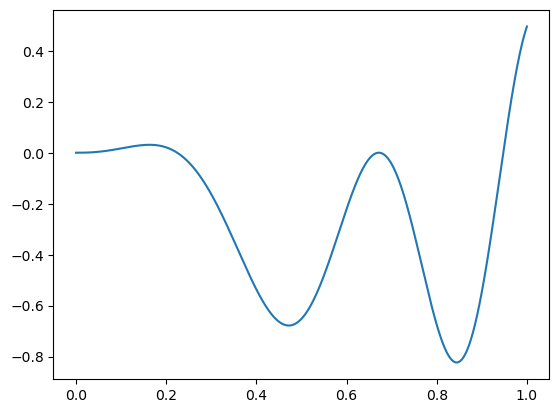

In [37]:
def f(x):
    a = 7
    sleep(np.random.normal(knf))
    return x**(1/2) * np.sin(a * x**2) * np.cos(a * x)

xs = np.linspace(0, 1, 100000)
ys = f(xs)

plt.plot(xs, ys)
plt.show()